Импорт pandas

In [132]:
import pandas as pd

In [133]:
df = pd.read_csv("ingredients_from_eda.ru.csv")
df

,id,ingredient,amount,name,type,page
0,13411,Вода,1 л,kapusta-po-gruzinski-137009,zagotovki,1
1,13410,Сахар,90 г,kapusta-po-gruzinski-137009,zagotovki,1
2,13421,Соль,12 г,kapusta-po-gruzinski-137009,zagotovki,1
3,14585,Уксус 9%-ный,250 мл,kapusta-po-gruzinski-137009,zagotovki,1
4,13436,Белокочанная капуста,1 штука,kapusta-po-gruzinski-137009,zagotovki,1
...,...,...,...,...,...,...
1159670,13458,Пшеничная мука,1 стакан,shokoladno-tvorozhnij-tort-chokochiz-49974,vypechka-deserty,1719
1159671,13546,Какао,2 столовые ложки,shokoladno-tvorozhnij-tort-chokochiz-49974,vypechka-deserty,1719
1159672,14232,Ликер,1 столовая ложка,shokoladno-tvorozhnij-tort-chokochiz-49974,vypechka-deserty,1719
1159673,13412,Сливочное масло,200 г,shokoladno-tvorozhnij-tort-chokochiz-49974,vypechka-deserty,1719


Сколько блюд разных типов:

In [140]:
df["type"].value_counts()

osnovnye-blyuda     482951
salaty              243764
supy                183055
zavtraki             72089
pasta-picca          53559
sousy-marinady       51319
vypechka-deserty     39165
sendvichi            27816
bulony                3777
zagotovki             1151
zakuski               1029
Name: type, dtype: int64

Наиболее популярные продукты в целом

In [141]:
popularity = df["ingredient"].value_counts()
popularity.head(10)

Чеснок                  45125
Соль                    39058
Оливковое масло         38959
Лук репчатый            34976
Сливочное масло         33875
Помидоры                32376
Яйцо куриное            26160
Пшеничная мука          25353
Картофель               23785
Перец черный молотый    23054
Name: ingredient, dtype: int64

Наименее популятные продукты в целом

In [142]:
popularity.tail(10)

Кольраби с ботвой        1
Рыба-скорпион            1
Молодые плоды люфы       1
Бульон бонито            1
Сок кинзы                1
Валенсийский апельсин    1
Бычки                    1
Специи для креветок      1
Семена черного лука      1
Кофейный экстракт        1
Name: ingredient, dtype: int64

Наиболее популярные продукты по категориям

Список категорий:

In [143]:
categories_list = list(set(df["type"]))

Продукты в каждой категории:

In [144]:
categories = df.groupby("type").agg({"ingredient": list})
categories

,ingredient
type,
bulony,"[Грибы, Нут, Шпинат, Картофель, Сельдерей, Лук..."
osnovnye-blyuda,"[Вода, Чечевица, Лук репчатый, Морковь, Укроп,..."
pasta-picca,"[Пшеничная мука, Соль, Сахар, Вода, Оливковое ..."
salaty,"[Перец черный молотый, Консервированная фасоль..."
sendvichi,"[Черный цельнозерновой хлеб, Растительное масл..."
sousy-marinady,"[Кунжутные семечки, Кунжутное масло, Яичный же..."
supy,"[Помидоры, Вода, Кокосовая стружка, Имбирь, Ра..."
vypechka-deserty,"[Яйцо куриное, Сахарная пудра, Пшеничная мука,..."
zagotovki,"[Вода, Сахар, Соль, Уксус 9%-ный, Белокочанная..."


Функция для подсчёта популярности в каждой категории:

In [147]:
def calculating_popularity(category):
    dict_category = dict() # словарь для продуктов в категории
    for x in categories.loc[category]["ingredient"]: # находим ингредиент в строчке с категорией
        dict_category[x] = categories.loc[category]["ingredient"].count(x) # ключ — продукт, значение — сколько раз он встречается
    dict_category = {k: dict_category[k] for k in sorted(dict_category, key=dict_category.get, reverse=True)} # сортировка по убыванию
    list = [(k, v) for k, v in dict_category.items()] # создаётся список туплов
    frame = pd.DataFrame(list, columns=['Name', 'Popularity']) # дата фрейм
    frame.set_index('Name', inplace=True) # удаляются индексы
    frame.head(10).plot.bar(
    title="Наиболее популярные в категории " + category,
    xlabel="Ингредиент",
    ylabel="Кол-во рецептов с ним"
)
    print(frame)
    frame.tail(10).plot.bar(
    title="Наименее популярные в категории " + category,
    xlabel="Ингредиент",
    ylabel="Кол-во рецептов с ним"
)

                       Popularity
Name                             
Лук репчатый                  330
Петрушка                      253
Морковь                       208
Лавровый лист                 205
Черный перец горошком         198
...                           ...
Пекинская капуста               1
Соленые огурцы                  1
Говяжья печень                  1
Сметана                         1
Оливковый майонез               1

[214 rows x 1 columns]


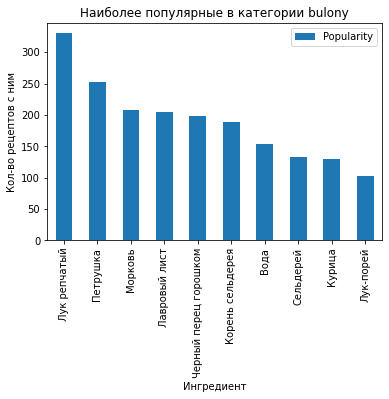

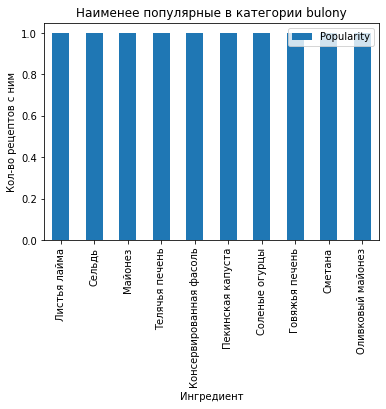

In [148]:
calculating_popularity("bulony")

Идём по списку категорий, рисуем графики (обновим после того, как догрузится)

In [ ]:
for i in categories_list:
    calculating_popularity(i)